In [1]:
#Standard
import numpy as np 
import pandas as pd
from numpy.random import randn
#Stats
from scipy import stats
#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#Command so that plots appears in the notebook 
%matplotlib inline

In [5]:
dataset = randn(25)

(0, 1)

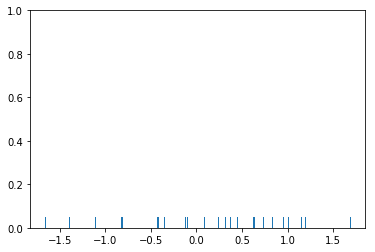

In [8]:
sns.rugplot(dataset)
plt.ylim(0,1)

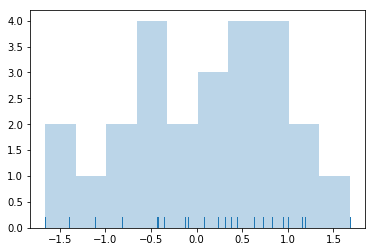

In [10]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

(0, 1)

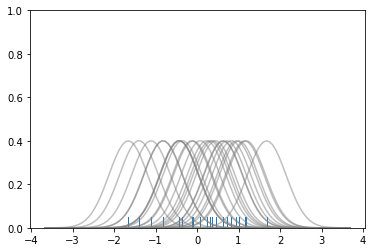

In [12]:
sns.rugplot(dataset)

x_min = dataset.min()-2
x_max = dataset.max()+2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset)))**0.2

kernel_list = []

for data_point in dataset:
    
    #create a kernel for each point and append it to the kernel list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of basis functions')

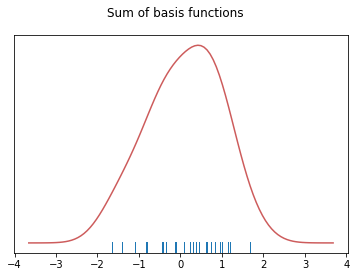

In [15]:
sum_of_kde = np.sum(kernel_list,axis = 0)
fig = plt.plot(x_axis,sum_of_kde, color = 'indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of basis functions")

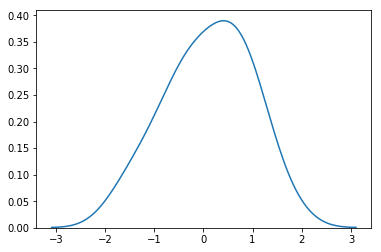

In [16]:
sns.kdeplot(dataset)

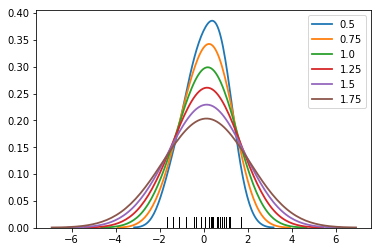

In [17]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw = bw, lw = 1.8,label = bw)

url = 'https://en.wikipedia.org/wiki/Kernel_(statistics)'

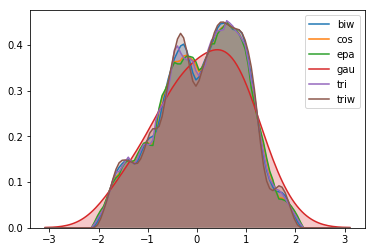

In [19]:
kernel_options = ['biw', 'cos', 'epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern , label = kern, shade = True)

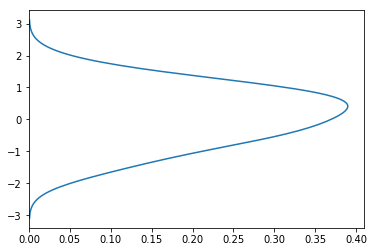

In [20]:
sns.kdeplot(dataset, vertical = True)

url = 'https://en.wikipedia.org/wiki/Cumulative_distribution_function'

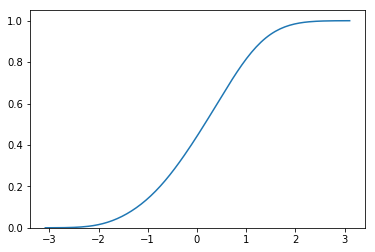

In [21]:
#print cdf
sns.kdeplot(dataset, cumulative = True)

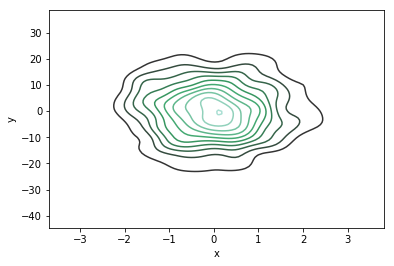

In [25]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, cov,1000)

dframe = pd.DataFrame(dataset2, columns = ['x','y'] )

sns.kdeplot(dframe.x,dframe.y)

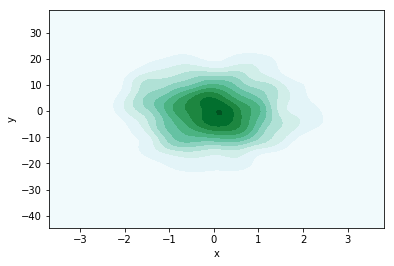

In [26]:
sns.kdeplot(dframe.x,dframe.y,shade = True)

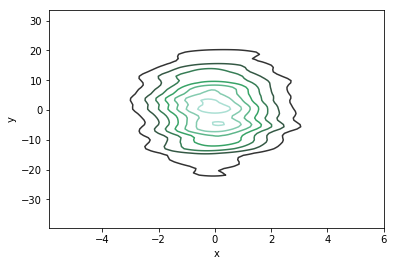

In [28]:
sns.kdeplot(dframe.x,dframe.y , bw = 1)

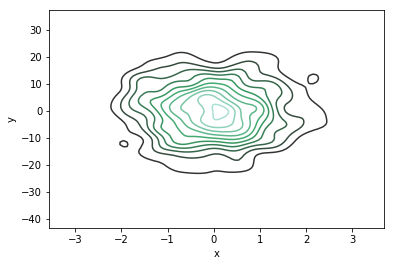

In [29]:
sns.kdeplot(dframe.x,dframe.y,bw ='silverman')

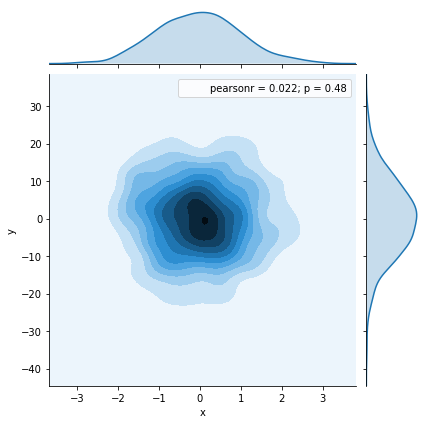

In [30]:
sns.jointplot('x','y',dframe,kind = 'kde')